In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.precision = 3

# pseudo

In [2]:
training = pd.read_csv('../data/Perron_phenotype-GSU-training.csv')
training

,strain,live,dead,ld.od,phe,od.avg,od.harvest,ecr,pvd,pch,...,cont.auc,carb.auc,toby.auc,carb.lag.delta,toby.lag.delta,bfrac,ecr.n,pch.n,pvd.n,sa.vir
0,1,45.380,16.230,0.192,0.132,0.353,1.121,0.01,6.96,12.335,...,0.736,0.458,0.766,19,4,0.352,0.009,11.004,6.209,6.437e-04
1,2,69.179,24.018,0.340,0.139,0.535,1.401,0.01,9.16,11.585,...,0.975,0.230,0.599,-2,14,0.388,0.007,8.272,6.541,6.463e-04
2,3,80.385,14.142,0.367,0.148,0.596,0.878,0.01,2.01,1.998,...,0.481,0.129,0.581,-2,7,0.381,0.011,2.274,2.288,6.914e-04
3,5,80.639,16.880,0.313,0.127,0.653,1.210,0.04,3.05,4.285,...,0.627,0.157,0.348,-9,-4,0.324,0.033,3.542,2.521,6.619e-04
4,7,62.412,19.353,0.222,0.122,0.389,1.281,0.02,6.35,39.130,...,0.726,0.413,0.878,0,3,0.364,0.016,30.547,4.957,6.106e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,370,40.219,18.263,0.079,0.268,0.241,1.340,0.07,2.14,2.952,...,0.721,0.354,0.229,-5,30,0.247,0.052,2.203,1.597,5.168e-04
230,371,24.724,14.156,0.065,0.139,0.169,0.661,0.19,11.75,19.919,...,0.321,0.127,0.308,34,4,0.278,0.287,30.135,17.776,5.163e-04
231,372,43.267,25.404,0.084,0.149,0.198,1.100,0.03,5.94,3.137,...,0.484,0.241,0.309,-16,-17,0.298,0.027,2.852,5.400,4.966e-04
232,373,24.693,22.340,0.077,0.128,0.206,1.360,0.10,1.58,3.545,...,0.628,0.642,0.247,24,25,0.273,0.074,2.607,1.162,5.549e-04


In [3]:
testing = pd.read_csv('../data/Perron_phenotype-GSU-testing.csv')
testing

,strain,live,dead,phe,od.harvest,env,cont.max.rate,cont.max.od,carb.max.rate,carb.max.od,...,toby.auc.delta,carb.lag.delta,toby.lag.delta,bfrac,ecr.n,pch.n,pvd.n,sa.vir,Niche,Sub-Niche
0,7,62.412,19.353,0.122,1.281,host,0.226,1.036,0.127,0.561,...,-0.152,0,3,0.364,0.016,30.547,4.957,6.106e-04,Clinical,Infection
1,11,92.477,17.748,0.150,0.700,host,0.205,1.046,0.117,0.637,...,0.326,0,14,0.416,0.071,5.144,2.429,5.022e-04,Clinical,Infection
2,49,61.479,15.370,0.114,1.442,host,0.239,1.213,0.216,0.645,...,0.037,0,1,0.221,0.000,6.072,3.634,7.028e-04,Clinical,Infection
3,51,82.887,17.918,0.156,1.387,host,0.234,1.117,0.226,1.217,...,0.019,1,1,0.313,0.007,6.666,4.356,6.481e-04,Clinical,Infection
4,92,90.865,16.119,0.261,1.252,host,0.301,1.187,0.288,1.158,...,0.292,1,15,0.286,0.008,5.237,5.002,6.381e-04,Clinical,Infection
5,100,23.072,12.632,0.150,1.560,envir,0.295,1.388,0.271,1.178,...,0.439,1,17,0.152,0.128,0.460,1.128,6.535e-04,NaN,Sea Water
6,121,23.241,14.750,0.136,1.810,envir,0.226,1.423,0.369,0.784,...,0.400,-3,14,0.101,0.116,3.109,48.370,6.586e-04,Saline water,Deep Sea Water
7,123,53.636,16.523,0.206,1.284,envir,0.293,1.083,0.280,1.063,...,0.505,1,22,0.112,0.016,1.805,3.670,6.154e-04,Saline water,Sea Water
8,130,48.421,18.239,0.152,1.153,envir,0.214,1.039,0.186,0.563,...,0.596,-2,33,0.170,0.017,2.113,2.646,6.061e-04,Saline water,Sea Water
9,153,93.077,32.485,0.234,1.148,host,0.164,1.146,0.080,0.913,...,0.591,13,29,0.413,0.026,1.440,1.202,6.275e-04,Animal,Host


# staph

In [4]:
nrs_meta = pd.read_csv('../data/nrs_metadata3.txt', delimiter='\t')
nrs_meta

,sample_tag,st,cc,MRSA,agr,Total.Area,glp,isdC,hypoth_protein,n43375,hemC,bip1487,bip1490,bip1504,bip1600,bip652
0,NRS001,5,5,True,2.0,0.000,0,0,0,True,0,0,0,0,0,0
1,NRS002,5,5,True,2.0,0.000,0,0,0,True,0,0,0,0,0,0
2,NRS003,5,5,True,2.0,0.000,0,0,0,True,0,0,0,0,0,0
3,NRS021,8,8,True,1.0,473.152,0,0,0,True,0,0,0,0,0,0
4,NRS022,45,45,False,1.0,6686.806,0,0,0,True,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,NRS272,247,8,True,1.0,15672.551,0,0,0,True,0,0,0,0,0,0
120,NRS275,254,8,False,1.0,9560.676,0,0,0,True,0,0,0,0,0,0
121,NRS383,36,30,True,3.0,2600.718,1,1,1,True,1,0,0,0,0,0
122,NRS386,72,72,True,1.0,20275.396,2,0,0,False,0,0,0,1,1,0


/mnt/ws/home/zzhang3/anaconda3/lib/python3.7/site-packages/numpy/lib/stride_tricks.py:262: UserWarning: Warning: converting a masked element to nan.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


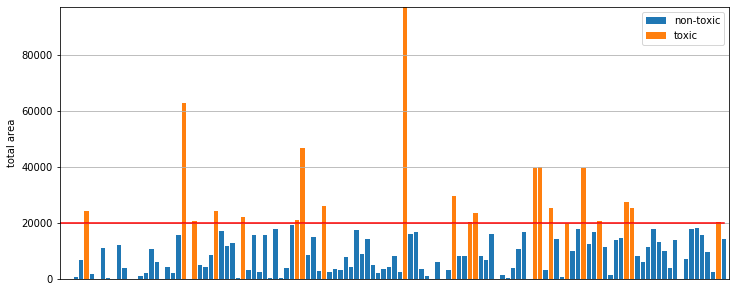

False    103
True      21
Name: Total.Area, dtype: int64

In [5]:
threshold = 20000

rows = nrs_meta.shape[0]
toxic = nrs_meta['Total.Area'] > threshold

plt.figure(figsize=(12, 5))
nt = np.ma.array(nrs_meta['Total.Area'], mask=toxic, fill_value=0.)
plt.bar(range(rows), nt, label='non-toxic')
t = np.ma.array(nrs_meta['Total.Area'], mask=~toxic, fill_value=0.)
plt.bar(range(rows), t, label='toxic')
plt.plot(range(rows), np.full(rows, fill_value=threshold), color='red')

plt.xticks([])
plt.ylabel('total area')
plt.xlim([0,rows])
plt.ylim(0, nrs_meta['Total.Area'].max())
plt.grid(axis='y')

plt.legend()
plt.show()
toxic.value_counts()